### **Reading Dataset**

In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
online_retail = pd.read_csv(r"C:\Users\Dell\Desktop\DS task\dataset\new_retail_data.csv")

In [10]:
online_retail.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [11]:
online_retail.info

<bound method DataFrame.info of         Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2      

### **Data Preprocessing**

**Convert the 'Date' column to datetime format**

In [12]:
online_retail['Date']

0          9/18/2023
1         12/31/2023
2          4/26/2023
3           5/8/2023
4          1/10/2024
             ...    
302005     1/20/2024
302006    12/28/2023
302007     2/27/2024
302008      9/3/2023
302009      1/8/2024
Name: Date, Length: 302010, dtype: object

In [14]:
online_retail['Date'] = pd.to_datetime(online_retail['Date'])

In [15]:
online_retail['Date']

0        2023-09-18
1        2023-12-31
2        2023-04-26
3        2023-05-08
4        2024-01-10
            ...    
302005   2024-01-20
302006   2023-12-28
302007   2024-02-27
302008   2023-09-03
302009   2024-01-08
Name: Date, Length: 302010, dtype: datetime64[ns]

**Check for and handle missing values**

In [17]:
print(online_retail.isnull().sum())

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64


In [18]:
online_retail.fillna(online_retail.mean(numeric_only=True), inplace=True)

for col in online_retail.select_dtypes(include='object'):
    online_retail[col].fillna(online_retail[col].mode()[0], inplace=True)

In [19]:
print(online_retail.isnull().sum())

Transaction_ID        0
Customer_ID           0
Name                  0
Email                 0
Phone                 0
Address               0
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                359
Year                  0
Month                 0
Time                  0
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64


In [20]:
online_retail['Date'] = online_retail['Date'].fillna(online_retail['Date'].min())
online_retail['Date'] = online_retail['Date'].fillna(online_retail['Date'].mode()[0])

In [21]:
print(online_retail['Date'].isnull().sum())

0


**Remove duplicate transactions**

In [22]:
online_retail['Transaction_ID'].duplicated().sum()

7548

In [23]:
online_retail = online_retail.drop_duplicates(subset='Transaction_ID', keep='first')

In [24]:
online_retail['Transaction_ID'].duplicated().sum()

0

**Extract year, month, and weekday from the 'Date' column**

In [25]:
online_retail['Weekday'] = online_retail['Date'].dt.weekday

C:\Users\Dell\AppData\Local\Temp\ipykernel_33420\1104259416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail['Weekday'] = online_retail['Date'].dt.weekday


In [26]:
online_retail['Weekday']

0         0
1         6
2         2
3         0
4         2
         ..
299652    2
299653    6
299654    0
299655    6
299656    1
Name: Weekday, Length: 294462, dtype: int64

In [28]:
print(online_retail[['Year', 'Month', 'Weekday']].head())

     Year      Month  Weekday
0  2023.0  September        0
1  2023.0   December        6
2  2023.0      April        2
3  2023.0        May        0
4  2024.0    January        2


### ***Data Analysis Using NumPy & Pandas***

**Calculate total revenue and average transaction value**

In [30]:
total_revenue = online_retail['Amount'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 75158059.03370583


In [31]:
average_transaction_value = online_retail['Amount'].mean()
print(f"Average Transaction Value: {average_transaction_value}")

Average Transaction Value: 255.23856739989432


**Identify the top 3 most popular product categories**

In [32]:
category_counts = online_retail['Product_Category'].value_counts()
top_3_categories = category_counts.head(3)

print(top_3_categories)

Electronics    69696
Grocery        65192
Clothing       53397
Name: Product_Category, dtype: int64


**Determine the most frequently used payment type**

In [33]:
payment_type_counts = online_retail['Payment_Method'].value_counts()
most_frequent_payment_type = payment_type_counts.idxmax()

print(f"The most frequently used payment type is: {most_frequent_payment_type}")

The most frequently used payment type is: Credit Card


**Compute monthly sales growth rate**

In [35]:
online_retail['YearMonth'] = online_retail['Date'].dt.to_period('M')
monthly_sales = online_retail.groupby('YearMonth')['Amount'].sum()
monthly_growth_rate = monthly_sales.pct_change() * 100

print(monthly_growth_rate)

YearMonth
2023-03         NaN
2023-04   -4.535335
2023-05    1.862863
2023-06   -2.257487
2023-07    3.113073
2023-08    0.246665
2023-09   -2.675328
2023-10    2.347517
2023-11   -2.757357
2023-12    2.203028
2024-01    1.608086
2024-02   -6.164044
Freq: M, Name: Amount, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_33420\2512584020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail['YearMonth'] = online_retail['Date'].dt.to_period('M')


**Identify the top 5 highest spending customers**

In [37]:
customer_spending = online_retail.groupby('Customer_ID')['Amount'].sum()
top_5_customers = customer_spending.sort_values(ascending=False).head(5)
top_5_customers.index = top_5_customers.index.astype(int)
top_5_customers = top_5_customers.round(0).astype(int)

print(top_5_customers)

Customer_ID
55006    77009
48453     4589
42972     3923
72561     3873
43958     3789
Name: Amount, dtype: int32


**Determine the busiest sales day of the week**

In [40]:
online_retail['Date'] = pd.to_datetime(online_retail['Date'], errors='coerce')
online_retail['Weekday'] = online_retail['Date'].dt.day_name()
weekday_sales = online_retail.groupby('Weekday')['Amount'].sum()
busiest_day = weekday_sales.sort_values(ascending=False)

print("Total Sales by Weekday:\n", busiest_day)
print(f"\nBusiest Sales Day: {busiest_day.idxmax()} with {busiest_day.max():,.2f} in sales.")

Total Sales by Weekday:
 Weekday
Wednesday    1.093620e+07
Thursday     1.090827e+07
Friday       1.075130e+07
Sunday       1.067935e+07
Saturday     1.064911e+07
Tuesday      1.063986e+07
Monday       1.059397e+07
Name: Amount, dtype: float64

Busiest Sales Day: Wednesday with 10,936,200.41 in sales.


C:\Users\Dell\AppData\Local\Temp\ipykernel_33420\3589477008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail['Date'] = pd.to_datetime(online_retail['Date'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_33420\3589477008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail['Weekday'] = online_retail['Date'].dt.day_name()


### **Data Visualization**

**Line Chart: Display monthly revenue trends for each product category**

<Figure size 1400x700 with 0 Axes>

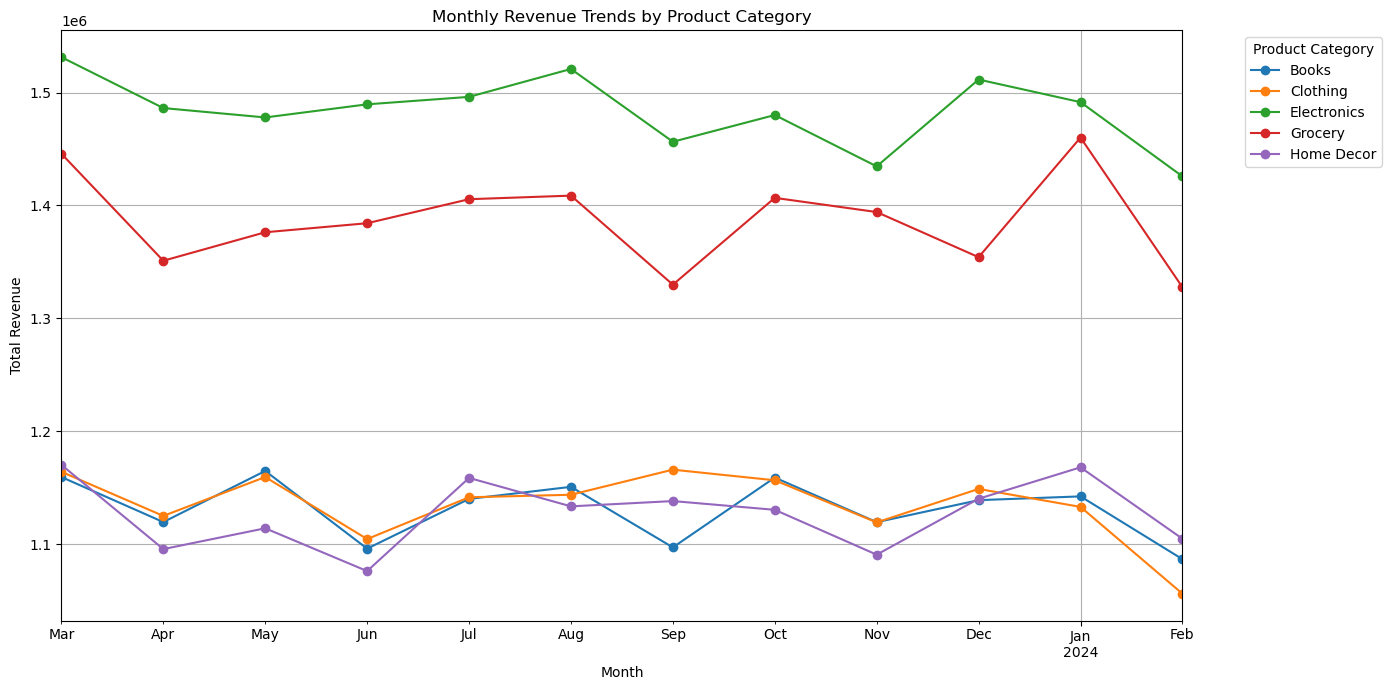

In [41]:
monthly_category_revenue = online_retail.groupby(['YearMonth', 'Product_Category'])['Amount'].sum().reset_index()
pivot_online_retail = monthly_category_revenue.pivot(index='YearMonth', columns='Product_Category', values='Amount')

plt.figure(figsize=(14, 7))
pivot_df.plot(kind='line', marker='o', figsize=(14, 7))
plt.title("Monthly Revenue Trends by Product Category")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Pie Chart: Show the distribution of sales by payment type**

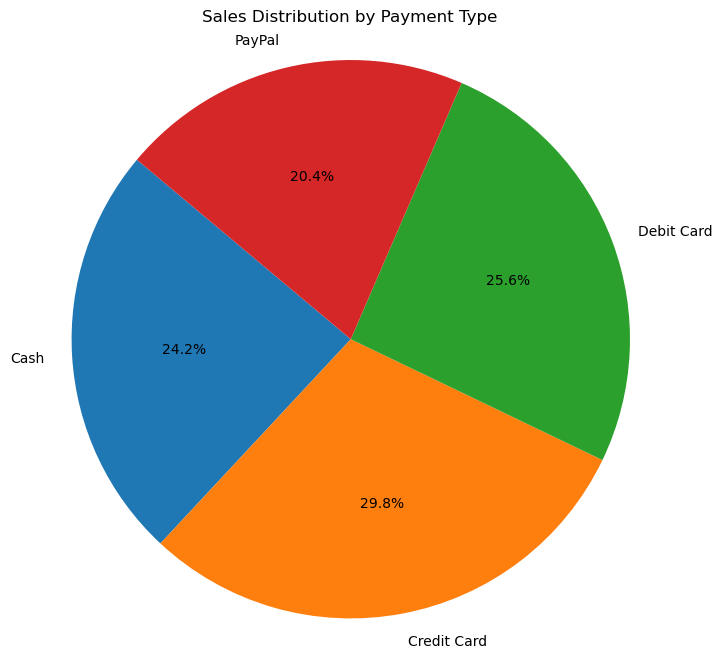

In [43]:
payment_distribution = online_retail.groupby('Payment_Method')['Amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Payment Type")
plt.axis('equal')
plt.show()

**Histogram: Illustrate the distribution of transaction amounts**

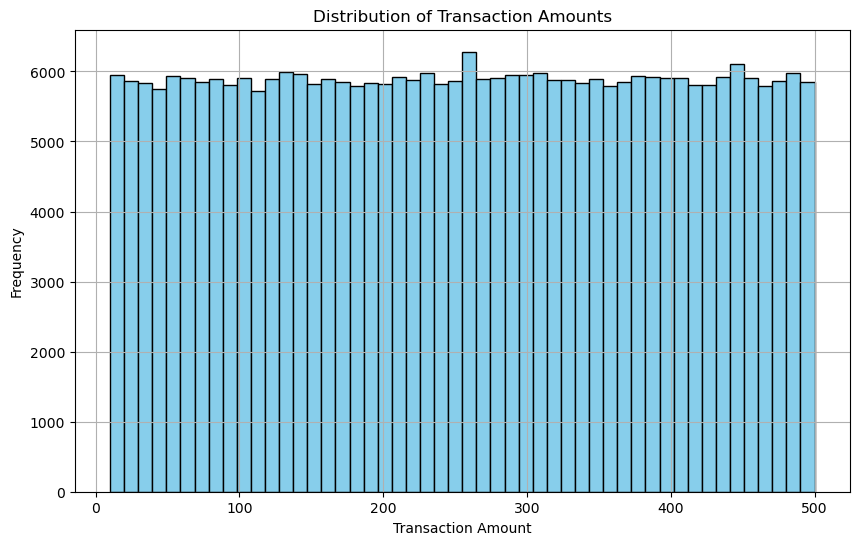

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(online_retail['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Area Chart: Compare sales performance across different regions over time**

C:\Users\Dell\AppData\Local\Temp\ipykernel_33420\2307715811.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


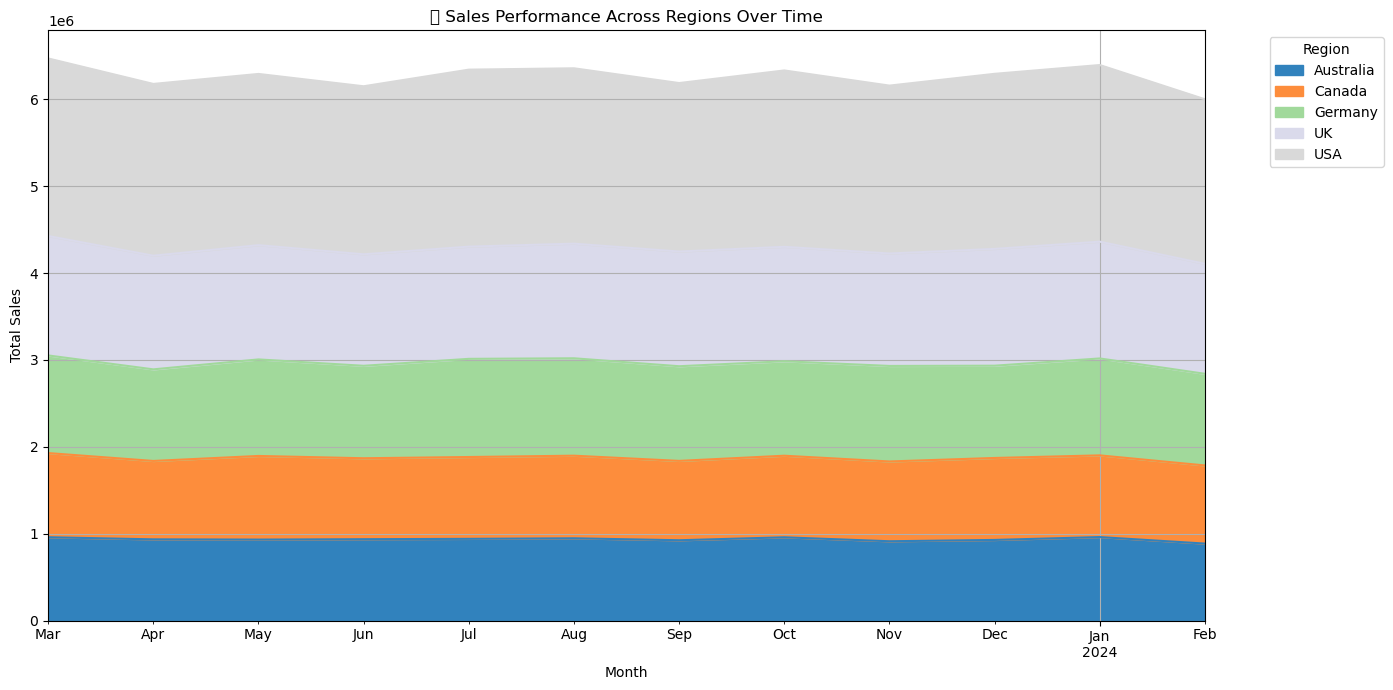

In [46]:
monthly_region_sales = online_retail.groupby(['YearMonth', 'Country'])['Amount'].sum().reset_index()
pivot_region = monthly_region_sales.pivot(index='YearMonth', columns='Country', values='Amount')

pivot_region.plot(kind='area', stacked=True, figsize=(14, 7), cmap='tab20c')
plt.title("📊 Sales Performance Across Regions Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Bonus Challenges**

**Calculate customer retention rate based on repeat purchases**

In [50]:
customer_monthly = online_retail.groupby(['Customer_ID', 'YearMonth'])['Transaction_ID'].count().reset_index()

repeat_customers = customer_monthly[customer_monthly['Transaction_ID'] > 1]

total_customers_month = online_retail.groupby('YearMonth')['Customer_ID'].nunique()
repeat_customers_month = customer_monthly[customer_monthly['Customer_ID'].isin(repeat_customers['Customer_ID'])].groupby('YearMonth')['Customer_ID'].nunique()

retention_rate = (repeat_customers_month / total_customers_month.shift(1)) * 100

print(retention_rate)

YearMonth
2023-03          NaN
2023-04    36.929988
2023-05    39.369893
2023-06    38.959042
2023-07    40.288621
2023-08    38.837808
2023-09    37.896871
2023-10    39.680967
2023-11    37.295684
2023-12    40.048590
2024-01    39.112716
2024-02    36.317884
Freq: M, Name: Customer_ID, dtype: float64


**Compare average spending per region**

In [52]:
average_spending_per_region = online_retail.groupby('Country')['Amount'].mean()
average_spending_per_region_sorted = average_spending_per_region.sort_values(ascending=False)

print(average_spending_per_region_sorted)

Country
UK           255.803210
Canada       255.242397
Australia    255.168542
USA          255.091917
Germany      254.884303
Name: Amount, dtype: float64


**Analyze the correlation between the number of units purchased and the total amount spent**

In [54]:
correlation = online_retail[['Total_Purchases', 'Amount']].corr()

print(correlation)

                 Total_Purchases    Amount
Total_Purchases         1.000000 -0.000154
Amount                 -0.000154  1.000000


**Create a heatmap using Seaborn to show sales trends by weekday and hour**

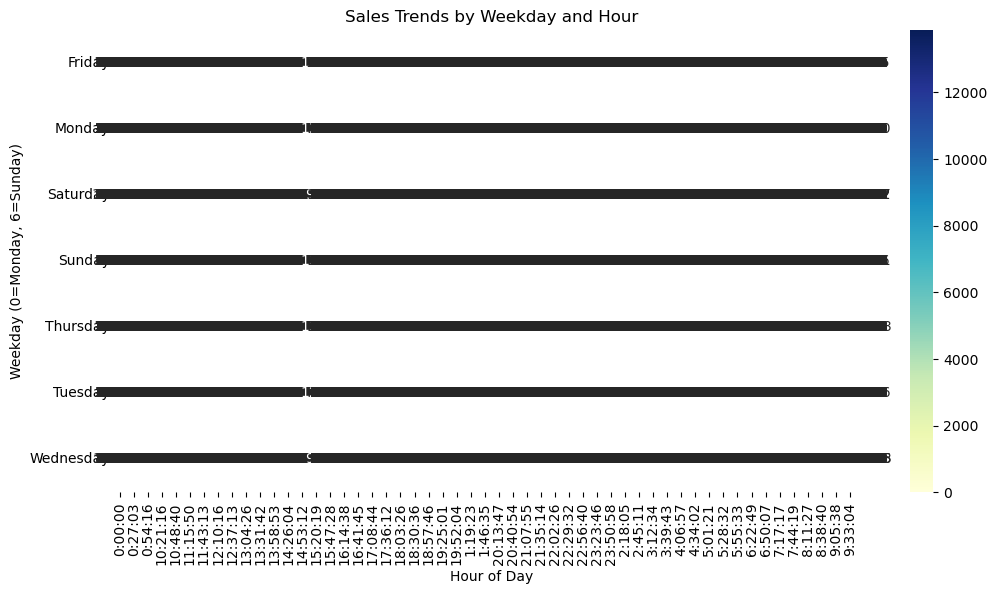

In [64]:
sales_by_weekday_hour = online_retail.groupby(['Weekday', 'Time'])['Amount'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(sales_by_weekday_hour, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title("Sales Trends by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday (0=Monday, 6=Sunday)")
plt.show()